# Natrual Language Processing Exam - spring 2024

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os


import string
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.model_selection import train_test_split
#from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

/Users/mikkelpedersen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mikkelpedersen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mikkelpedersen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Exploratory Data Analysis (EDA)

In [2]:
path = f'{os.getcwd()}/reddit_mental_syg.csv'

reddit = pd.read_csv(path, index_col=False)
reddit.head(10)

Unnamed: 0                                               text  \
0           0  Welcome to /r/depression's check-in post - a p...   
1           1  We understand that most people who reply immed...   
2           2  Anyone else just miss physical touch? I crave ...   
3           3  I’m just so ashamed. Everyone and everything f...   
4           4  I really need a friend. I don't even have a si...   
5           5  Hear me out... life in general sucks. We have ...   
6           6  Never in a million years did I think I’d be on...   
7           7  Hi!! \n\nI want to preface by saying, i’m sorr...   
8           8  I’m 40(M) and I’ve always maintained that I’m ...   
9           9  I used to get through my life by believing in ...   

                                               title  target  
0  Regular check-in post, with information about ...       1  
1  Our most-broken and least-understood rules is ...       1  
2  I haven’t been touched, or even hugged, in so ...       1  
3                    Being Depressed is Embarrassing       1  
4  I'm desperate for a friend and to feel loved b...       1  
5  Call me crazy but suicide seems rational at th...       1  
6  Could really use someone to talk to. I’m falli...       1  
7   Can i rant to someone?? You can rant in return!!       1  
8             I don’t want to care about being alone       1  
9                   Hope is just a form of self-harm       1

In [3]:
def caount_labels(data, col1):
    print('The amount of missing values in the dataframe:')
    print(data.isnull().sum())
    print('-'*40)
    print('The amount of 1, 0 in CB_Label -> class balance:')
    print(data[col1].value_counts())
    print('-'*40)
    print('Some basic info of the DataFrame')
    print(data.info())
    print('-'*40)
    value_count_target = data[col1].value_counts()

    ax = sns.countplot(x=data[col1], hue=data[col1], palette='rocket')
    ax.set_xlabel(f"Name of Class")
    ax.set_ylabel("The Number Of Samples for each class")

    for i, count in enumerate(value_count_target.values):
        ax.text(i, count + 5, str(count), ha='center', va='top')


    plt.show()

The amount of missing values in the dataframe:
Unnamed: 0      0
text          350
title           0
target          0
dtype: int64
----------------------------------------
The amount of 1, 0 in CB_Label -> class balance:
target
1    1202
3    1201
4    1188
2    1185
0    1181
Name: count, dtype: int64
----------------------------------------
Some basic info of the DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5957 entries, 0 to 5956
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5957 non-null   int64 
 1   text        5607 non-null   object
 2   title       5957 non-null   object
 3   target      5957 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 186.3+ KB
None
----------------------------------------


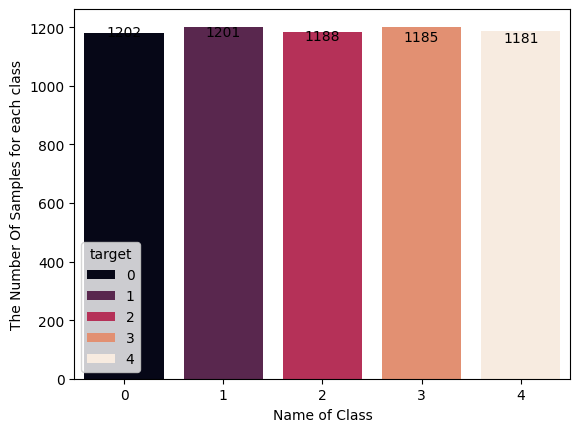

In [4]:
caount_labels(reddit, 'target')

In [5]:
reddit = reddit.drop(['Unnamed: 0'], axis=1)
reddit

text  \
0     Welcome to /r/depression's check-in post - a p...   
1     We understand that most people who reply immed...   
2     Anyone else just miss physical touch? I crave ...   
3     I’m just so ashamed. Everyone and everything f...   
4     I really need a friend. I don't even have a si...   
...                                                 ...   
5952  I’ve (24M) dealt with depression/anxiety for y...   
5953   "I don't feel very good, it's like I don't be...   
5954  I can't sleep most of the nights, meds didn't ...   
5955  Hi, all. I have to give a presentation at work...   
5956  It's not about being scared I didn't lock the ...   

                                                  title  target  
0     Regular check-in post, with information about ...       1  
1     Our most-broken and least-understood rules is ...       1  
2     I haven’t been touched, or even hugged, in so ...       1  
3                       Being Depressed is Embarrassing       1  
4     I'm desperate for a friend and to feel loved b...       1  
...                                                 ...     ...  
5952                          Nobody takes me seriously       4  
5953                                        selfishness       4  
5954                  Is there any way to sleep better?       4  
5955                              Public speaking tips?       4  
5956                    I have really bad door anxiety!       4  

[5957 rows x 3 columns]

In [6]:
reddit = reddit.dropna()

The amount of missing values in the dataframe:
text      0
title     0
target    0
dtype: int64
----------------------------------------
The amount of 1, 0 in CB_Label -> class balance:
target
1    1202
4    1144
0    1099
2    1085
3    1077
Name: count, dtype: int64
----------------------------------------
Some basic info of the DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 5607 entries, 0 to 5956
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5607 non-null   object
 1   title   5607 non-null   object
 2   target  5607 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 175.2+ KB
None
----------------------------------------


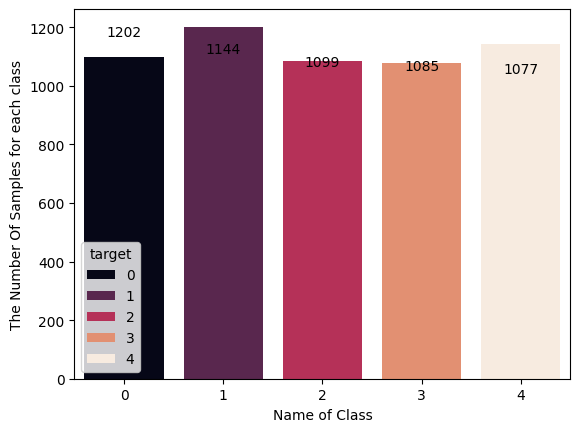

In [7]:
caount_labels(reddit, 'target')

In [8]:
reddit['text'] = reddit['text'].astype(str)
reddit['title'] = reddit['title'].astype(str)

reddit['text_length'] = reddit['text'].apply(lambda x: len(x))
reddit['title_length'] = reddit['title'].apply(lambda x: len(x))

reddit.head(10)

text  \
0  Welcome to /r/depression's check-in post - a p...   
1  We understand that most people who reply immed...   
2  Anyone else just miss physical touch? I crave ...   
3  I’m just so ashamed. Everyone and everything f...   
4  I really need a friend. I don't even have a si...   
5  Hear me out... life in general sucks. We have ...   
6  Never in a million years did I think I’d be on...   
7  Hi!! \n\nI want to preface by saying, i’m sorr...   
8  I’m 40(M) and I’ve always maintained that I’m ...   
9  I used to get through my life by believing in ...   

                                               title  target  text_length  \
0  Regular check-in post, with information about ...       1         2644   
1  Our most-broken and least-understood rules is ...       1         4792   
2  I haven’t been touched, or even hugged, in so ...       1           58   
3                    Being Depressed is Embarrassing       1          905   
4  I'm desperate for a friend and to feel loved b...       1          237   
5  Call me crazy but suicide seems rational at th...       1          585   
6  Could really use someone to talk to. I’m falli...       1         2318   
7   Can i rant to someone?? You can rant in return!!       1          533   
8             I don’t want to care about being alone       1         1519   
9                   Hope is just a form of self-harm       1         1054   

   title_length  
0            65  
1           144  
2            97  
3            31  
4            56  
5            56  
6            54  
7            48  
8            38  
9            32

In [9]:
# mean of the text length
round(np.mean(reddit['text_length']), 2)

836.22

In [10]:
def length_dis(data, col1, col2):
    mean_class_dis = reddit['text_length'].mean()
    fig, ax = plt.subplots(1,1,figsize = (8,5))
    sns.histplot(data,
                x = col1,
                bins = 80,
                hue = col2,
                ax = ax)
    plt.axvline(mean_class_dis, color='red', linestyle='--')

    print(data[col1].sort_values(ascending=False).head(10))

4310    27542
3167     8566
863      8511
5689     8432
1829     8265
5141     7141
5676     7050
617      6767
1571     6308
614      6004
Name: text_length, dtype: int64


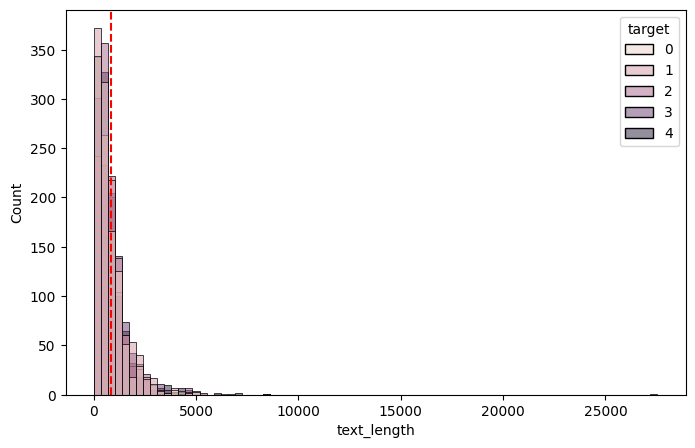

In [11]:
length_dis(reddit, 'text_length', 'target')

# Pre processing

In [12]:
stemmer = PorterStemmer()#WordNetLemmatizer() 
stop = stopwords.words('english')
# The nltk tweettokenizer is specificly made for twitter tweets or user inputted text -> https://www.nltk.org/api/nltk.tokenize.casual.html
tt = TweetTokenizer()

def pre_process(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    #remove stopwords and stem
    words = [word for word in text.split() if word not in stop]
    text = ' '.join([stemmer.stem(word) for word in words])
    
    #tokenize
    text = tt.tokenize(text)
    return text
    

In [13]:
pre_process("""The Teacher is a remarkable woman who has dedicated her life to the field of Natural Language Processing (NLP). 
                With her radiant smile and infectious enthusiasm, she has the ability to make complex concepts seem simple. 
                """)

['teacher',
 'remark',
 'woman',
 'dedic',
 'life',
 'field',
 'natur',
 'languag',
 'process',
 'nlp',
 'radiant',
 'smile',
 'infecti',
 'enthusiasm',
 'abil',
 'make',
 'complex',
 'concept',
 'seem',
 'simpl']

In [14]:
reddit['text_pre'] = reddit['text'].apply(pre_process)
reddit['title_pre'] = reddit['title'].apply(pre_process)
reddit.head(10)

text  \
0  Welcome to /r/depression's check-in post - a p...   
1  We understand that most people who reply immed...   
2  Anyone else just miss physical touch? I crave ...   
3  I’m just so ashamed. Everyone and everything f...   
4  I really need a friend. I don't even have a si...   
5  Hear me out... life in general sucks. We have ...   
6  Never in a million years did I think I’d be on...   
7  Hi!! \n\nI want to preface by saying, i’m sorr...   
8  I’m 40(M) and I’ve always maintained that I’m ...   
9  I used to get through my life by believing in ...   

                                               title  target  text_length  \
0  Regular check-in post, with information about ...       1         2644   
1  Our most-broken and least-understood rules is ...       1         4792   
2  I haven’t been touched, or even hugged, in so ...       1           58   
3                    Being Depressed is Embarrassing       1          905   
4  I'm desperate for a friend and to feel loved b...       1          237   
5  Call me crazy but suicide seems rational at th...       1          585   
6  Could really use someone to talk to. I’m falli...       1         2318   
7   Can i rant to someone?? You can rant in return!!       1          533   
8             I don’t want to care about being alone       1         1519   
9                   Hope is just a form of self-harm       1         1054   

   title_length                                           text_pre  \
0            65  [welcom, rdepress, checkin, post, place, take,...   
1           144  [understand, peopl, repli, immedi, op, invit, ...   
2            97  [anyon, els, miss, physic, touch, crave, badly...   
3            31  [i, ’, m, asham, everyon, everyth, feel, far, ...   
4            56  [realli, need, friend, dont, even, singl, best...   
5            56  [hear, life, gener, suck, work, major, time, j...   
6            54  [never, million, year, think, i, ’, d, reddit,...   
7            48  [hi, want, prefac, say, i, ’, m, sorri, know, ...   
8            38  [i, ’, m, 40m, i, ’, v, alway, maintain, i, ’,...   
9            32  [use, get, life, believ, delus, thing, go, wor...   

                                           title_pre  
0       [regular, checkin, post, inform, rule, wiki]  
1  [mostbroken, leastunderstood, rule, helper, ma...  
2  [haven, ’, t, touch, even, hug, long, can, ’, ...  
3                               [depress, embarrass]  
4           [im, desper, friend, feel, love, someon]  
5         [call, crazi, suicid, seem, ration, point]  
6  [could, realli, use, someon, talk, i, ’, m, fa...  
7                       [rant, someon, rant, return]  
8                      [don, ’, t, want, care, alon]  
9                             [hope, form, selfharm]

In [15]:
reddit['text_pre'] = reddit['text_pre'].apply(' '.join)
reddit['title_pre'] = reddit['title_pre'].apply(' '.join)

In [16]:
X = reddit['text_pre']
y = reddit['target'] # for both types

X_trian, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=42,
                                                    stratify=y)


In [17]:
X_train_cop = X_trian.copy(deep=True)
X_test_cop = X_test.copy(deep=True)

In [18]:
vectorizer = CountVectorizer()

#Correct below comment
# The reson for only applying fit_transform on the X_train is to learn the vocabulary and transform the data into a document-term matrix. As i understood this helps prevent data leakege???
# The labels is a reday for use so they will not be vectorized
X_trian = vectorizer.fit_transform(X_trian)
X_test = vectorizer.transform(X_test)

In [32]:
len(vectorizer.vocabulary_)

12716

# Models

In [19]:
# Tradiotional ML models
mlb = MultinomialNB(alpha=0.1, fit_prior=True, force_alpha=True)
lr = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)

def train_model(model):
    for model in [model]:
        model.fit(X_trian, y_train)
        y_pred = model.predict(X_test)
        train_acc = round(model.score(X_trian, y_train)*100, 3)
        test_acc = round(accuracy_score(y_test, y_pred)*100, 3)
        print('The accuracy for the traning set: ', train_acc)
        print('The accuracy for the test set: ', test_acc)
        print('-' * 40)
        return y_pred 
    
def metrics(model, y_test, y_pred):
    for model in [model]:
        print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    # Define class names
    classes = {
        0: 'Stress',
        1: 'Depression',
        2: 'Bipolar disorder',
        3: 'Personality disorder',
        4: 'Anxiety'}
    labels = list(classes.values())

    fig,ax = plt.subplots(1,1,figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=labels, yticklabels=labels,ax=ax, cbar=False)
    plt.xticks(rotation=45)
    plt.show()

In [20]:
print('classification based on the text')
train_model(lr)
train_model(svc)
train_model(rf)

classification based on the text
The accuracy for the traning set:  99.182
The accuracy for the test set:  75.772
----------------------------------------
The accuracy for the traning set:  88.541
The accuracy for the test set:  73.278
----------------------------------------
The accuracy for the traning set:  99.685
The accuracy for the test set:  78.86
----------------------------------------


array([0, 3, 0, 2, 1, 2, 0, 4, 0, 1, 0, 1, 0, 1, 0, 2, 2, 4, 3, 0, 3, 3,
       1, 4, 4, 3, 2, 0, 1, 1, 1, 4, 2, 1, 0, 1, 0, 0, 1, 3, 4, 1, 2, 3,
       0, 2, 0, 2, 0, 1, 0, 1, 3, 4, 2, 3, 3, 2, 2, 0, 0, 3, 3, 0, 4, 3,
       1, 3, 1, 4, 4, 4, 1, 2, 3, 4, 0, 1, 2, 3, 3, 4, 1, 1, 1, 1, 3, 4,
       1, 0, 2, 4, 1, 0, 2, 0, 0, 1, 1, 4, 2, 4, 3, 3, 3, 2, 2, 3, 4, 0,
       1, 2, 2, 3, 3, 4, 1, 3, 2, 0, 4, 0, 0, 2, 3, 0, 1, 3, 4, 4, 4, 3,
       3, 0, 3, 1, 2, 0, 2, 0, 1, 3, 1, 3, 1, 1, 0, 3, 2, 1, 1, 1, 3, 1,
       1, 0, 4, 0, 0, 3, 1, 2, 1, 2, 3, 3, 3, 4, 1, 2, 1, 1, 1, 3, 1, 1,
       2, 1, 2, 2, 4, 2, 2, 4, 1, 4, 4, 2, 2, 0, 3, 0, 0, 3, 2, 3, 0, 1,
       2, 1, 2, 1, 0, 3, 1, 3, 4, 1, 3, 4, 1, 4, 0, 4, 1, 2, 4, 0, 0, 0,
       1, 2, 1, 3, 2, 3, 4, 1, 1, 2, 3, 4, 3, 1, 1, 3, 0, 2, 1, 3, 4, 1,
       4, 2, 0, 1, 1, 4, 1, 1, 0, 3, 0, 1, 0, 4, 1, 3, 4, 4, 2, 4, 1, 1,
       0, 2, 1, 1, 2, 0, 2, 1, 3, 4, 1, 1, 2, 1, 2, 4, 3, 3, 1, 1, 2, 4,
       3, 3, 3, 1, 1, 3, 0, 4, 2, 4, 0, 3, 3, 1, 3,

In [21]:
y_pred_mlb = train_model(mlb)

The accuracy for the traning set:  90.136
The accuracy for the test set:  73.159
----------------------------------------


              precision    recall  f1-score   support

           0       0.78      0.67      0.72       165
           1       0.67      0.68      0.67       180
           2       0.85      0.80      0.82       163
           3       0.69      0.85      0.76       162
           4       0.70      0.67      0.69       172

    accuracy                           0.73       842
   macro avg       0.74      0.73      0.73       842
weighted avg       0.74      0.73      0.73       842



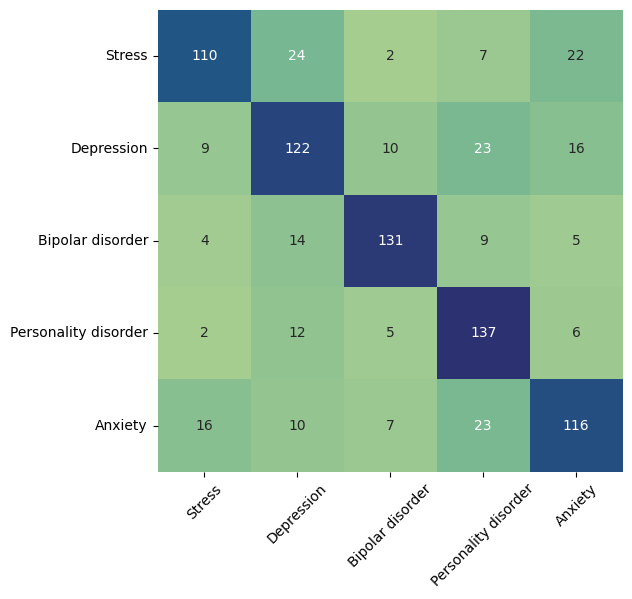

In [22]:
metrics(mlb, y_test, y_pred_mlb)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1,2))),('multinomialnb', MultinomialNB(alpha=0.35, fit_prior=True, force_alpha=True))])

#pipeline_mlb = make_pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1,2))),('multinomialnb', mlb)])
pipe.fit(X_train_cop, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB(alpha=0.35))])

In [24]:
preds = pipe.predict(X_test_cop)

              precision    recall  f1-score   support

           0       0.87      0.72      0.78       165
           1       0.67      0.76      0.72       180
           2       0.92      0.79      0.85       163
           3       0.76      0.85      0.80       162
           4       0.73      0.77      0.75       172

    accuracy                           0.78       842
   macro avg       0.79      0.78      0.78       842
weighted avg       0.79      0.78      0.78       842



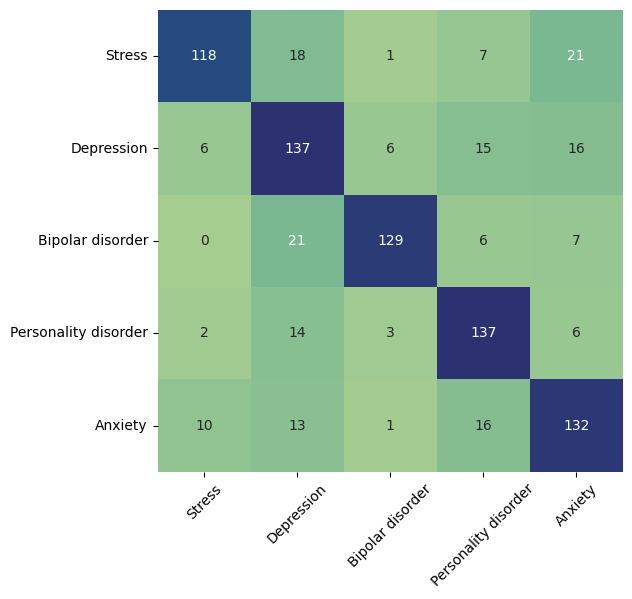

In [30]:
metrics(pipe, y_test, preds)

In [27]:
nb_model = pipe.named_steps['multinomialnb']
feature_log_prob = nb_model.feature_log_prob_

In [34]:
feature_prob = np.exp(feature_log_prob)

feature_names = pipe.named_steps['vectorizer'].get_feature_names_out()

# Print feature importances for a class
class_index = 1
class_prob = feature_prob[class_index]

print(f"Class {class_index} feature importances:")
sorted_indices = np.argsort(class_prob)[::-1]
for idx in sorted_indices:
    print(f"Feature: {feature_names[idx]}, Importance: {round(class_prob[idx], 5)}")

Class 1 feature importances:
Feature: feel, Importance: 0.00689
Feature: like, Importance: 0.00558
Feature: im, Importance: 0.00459
Feature: want, Importance: 0.00412
Feature: get, Importance: 0.00403
Feature: life, Importance: 0.00342
Feature: dont, Importance: 0.00315
Feature: go, Importance: 0.00315
Feature: know, Importance: 0.00309
Feature: time, Importance: 0.00301
Feature: even, Importance: 0.00298
Feature: depress, Importance: 0.00268
Feature: don, Importance: 0.0026
Feature: thing, Importance: 0.00246
Feature: peopl, Importance: 0.00243
Feature: feel like, Importance: 0.00234
Feature: year, Importance: 0.00226
Feature: make, Importance: 0.00225
Feature: tri, Importance: 0.00215
Feature: day, Importance: 0.00208
Feature: friend, Importance: 0.00206
Feature: would, Importance: 0.00198
Feature: one, Importance: 0.00195
Feature: think, Importance: 0.00188
Feature: realli, Importance: 0.00181
Feature: work, Importance: 0.0018
Feature: much, Importance: 0.0017
Feature: help, Importa

In [29]:
from sklearn.model_selection import GridSearchCV


def best_grid_search(model):
    print('Best  parameters found by grid search:', model.best_params_ )
    print('Best score for the model', model.best_score_)
    print('-' * 40)


In [ ]:
# tilføj ngrams til parm_grid

In [ ]:
parm_grid = {'vectorizer__ngram_range' : [(1,1), (1,2), (1,3), (1,4), (1,5)], 
             'multinomialnb__alpha' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.35, 0.5, 0.75, 1],
             'multinomialnb__fit_prior' : [True, None],
             'multinomialnb__force_alpha' : [True, None]
             }

mlb_grid_model = GridSearchCV(pipe,
                              param_grid=parm_grid, 
                              cv=10, 
                              scoring='accuracy')
mlb_grid_model.fit(X_train_cop, y_train)

best_grid_search(mlb_grid_model)

In [ ]:
X_train_llm, X_test_llm, y_train_llm, y_test_llm = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import pipeline

text_to_classify = reddit['text_pre'][np.random.randint(0,5956)]
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli') 
llm_classes = ['Stress', 'Depression','Bipolar disorder', 'Personality disorder','Anxiety']

result = classifier(text_to_classify, llm_classes)

# Print the result
print('-'*40)
print(text_to_classify)
for label, score in zip(result['labels'], result['scores']):
    print(f"{label}: {score:.4f}")

def classify_text(pre_processd_text):
    results = []
    for text in pre_processd_text:
        result = classifier(text, llm_classes)
        results.append(result)
    return results

In [ ]:
classify_text(reddit['text_pre'][:1000]) 